In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [73]:
data  = pd.read_csv("Housing.csv")

In [74]:
data = pd.get_dummies(data)

In [75]:
data.head

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0    13300000  7420         4          2        3        2            0   
1    12250000  8960         4          4        4        3            0   
2    12250000  9960         3          2        2        2            0   
3    12215000  7500         4          2        2        3            0   
4    11410000  7420         4          1        2        2            0   
..        ...   ...       ...        ...      ...      ...          ...   
540   1820000  3000         2          1        1        2            0   
541   1767150  2400         3          1        1        0            1   
542   1750000  3620         2          1        1        0            0   
543   1750000  2910         3          1        1        0            1   
544   1750000  3850         3          1        2        0            0   

     mainroad_yes  guestroom_no  guestroom_yes  ...  basement_yes  \


In [76]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [77]:
len(data.columns)

21

In [78]:
data.isnull().sum()


price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_no                        0
mainroad_yes                       0
guestroom_no                       0
guestroom_yes                      0
basement_no                        0
basement_yes                       0
hotwaterheating_no                 0
hotwaterheating_yes                0
airconditioning_no                 0
airconditioning_yes                0
prefarea_no                        0
prefarea_yes                       0
furnishingstatus_furnished         0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

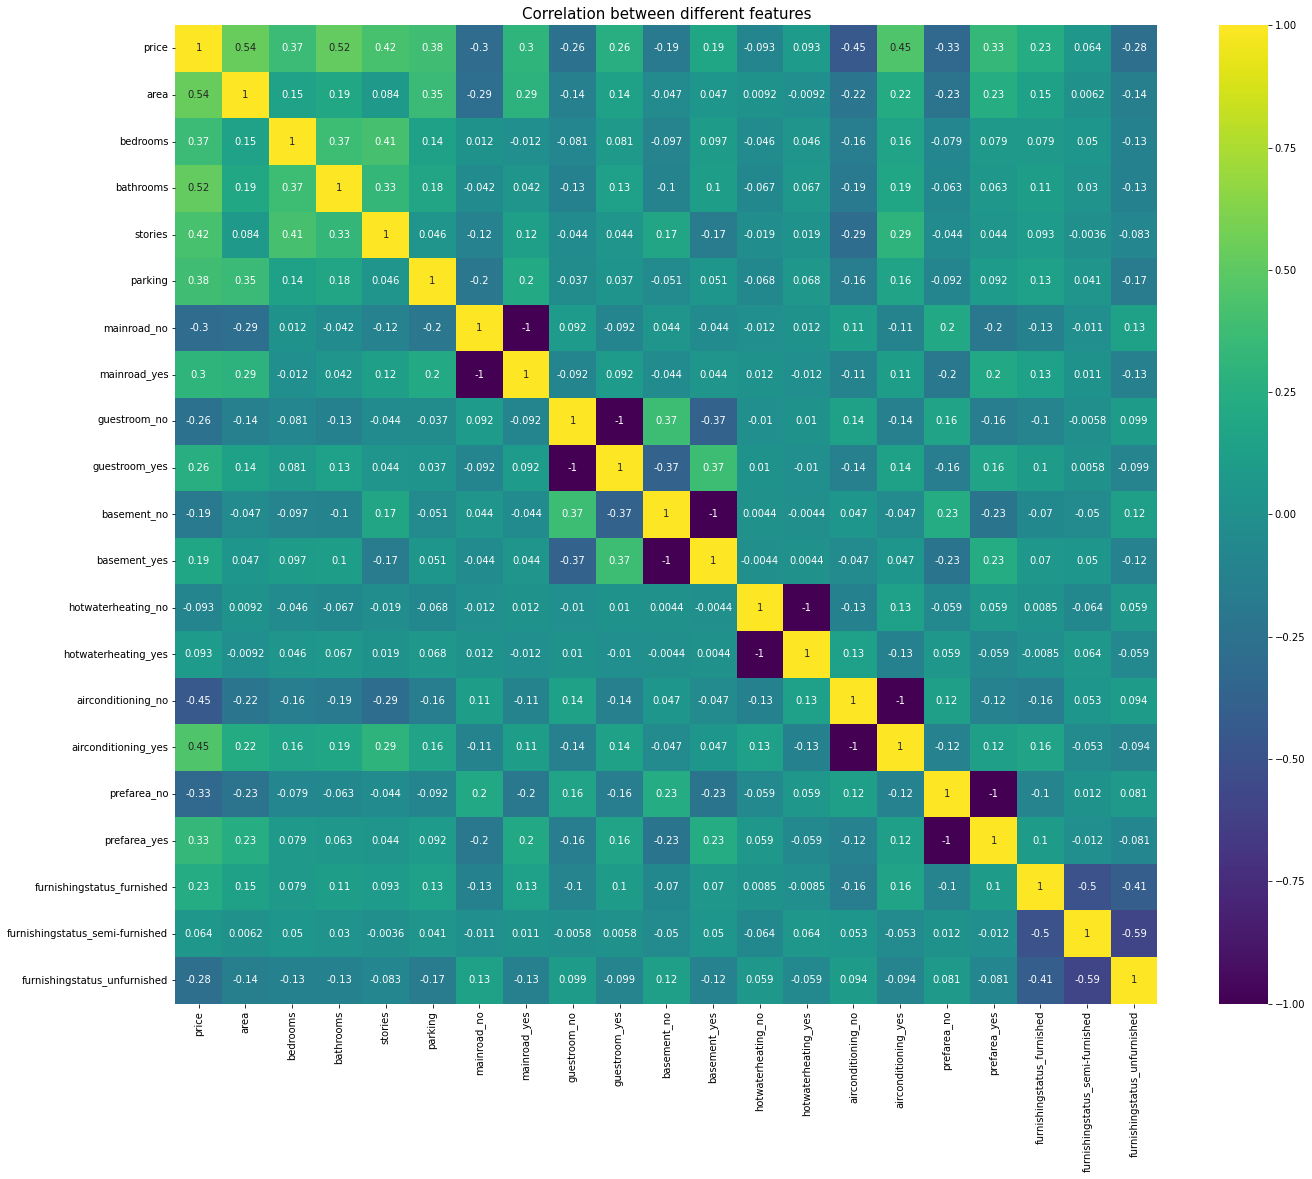

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(22, 18))
sns.heatmap(data.corr(), annot=True,cmap='viridis')
plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [80]:
corr=data.corr()
corr.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,-0.296898,0.296898,-0.255517,0.255517,...,0.187057,-0.093073,0.093073,-0.452954,0.452954,-0.329777,0.329777,0.229350,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,-0.288874,0.288874,-0.140297,0.140297,...,0.047417,0.009229,-0.009229,-0.222393,0.222393,-0.234779,0.234779,0.145772,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,0.012033,-0.012033,-0.080549,0.080549,...,0.097312,-0.046049,0.046049,-0.160603,0.160603,-0.079023,0.079023,0.079054,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,-0.042398,0.042398,-0.126469,0.126469,...,0.102106,-0.067159,0.067159,-0.186915,0.186915,-0.063472,0.063472,0.108139,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,-0.121706,0.121706,-0.043538,0.043538,...,-0.172394,-0.018847,0.018847,-0.293602,0.293602,-0.044425,0.044425,0.093176,-0.003648,-0.082972


## Random Forest Regressor

In [81]:
X = data.drop('price', axis=1)
y = data['price']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((436, 20), (436,), (109, 20), (109,))

In [84]:
RFmodel = RandomForestRegressor(n_estimators=100, random_state=42)

In [85]:
RFmodel.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [86]:
y_test_RF = RFmodel.predict(X_test)

In [87]:
mse = mean_squared_error(y_test, y_pred)

In [88]:
print("Mean Squared Error:", mse)

Mean Squared Error: 1695341286633.702


## Using other models for comparision

In [89]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [90]:
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

In [91]:
evaluation_metrics = {
    "R-squared": r2_score,
    "Mean Absolute Error": mean_absolute_error,
    "Mean Squared Error": mean_squared_error,
    "Root Mean Squared Error": lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False)
}

In [92]:
results = {}
for name, y_pred in predictions.items():
    metrics = {}
    for metric_name, metric_func in evaluation_metrics.items():
        metric_value = metric_func(y_test, y_pred)
        metrics[metric_name] = metric_value
    results[name] = metrics

In [93]:
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")
    print()

Model: Linear Regression
R-squared: 0.6529242642153188
Mean Absolute Error: 970043.4039201637
Mean Squared Error: 1754318687330.6616
Root Mean Squared Error: 1324506.960091438

Model: Random Forest Regressor
R-squared: 0.6099715703676805
Mean Absolute Error: 1025824.3793577981
Mean Squared Error: 1971426095653.9329
Root Mean Squared Error: 1404074.8183960614

Model: Gradient Boosting Regressor
R-squared: 0.6645923977701813
Mean Absolute Error: 969687.9265798924
Mean Squared Error: 1695341286633.702
Root Mean Squared Error: 1302052.7203741414



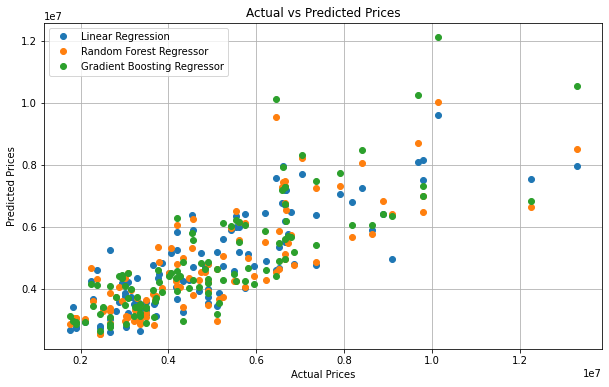

In [94]:
plt.figure(figsize=(10, 6))
for name, y_pred in predictions.items():
    plt.plot(y_test, y_pred, marker='o', linestyle='', label=name)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

In [95]:
best_model = min(results, key=lambda x: (results[x]['Mean Squared Error'], 
                                         results[x]['Mean Absolute Error'], 
                                         results[x]['Root Mean Squared Error'],
                                         -results[x]['R-squared']))
print(f"The best model is: {best_model}")

The best model is: Gradient Boosting Regressor
